<a href="https://colab.research.google.com/github/valeromora/Procesamiento_Digital_de_Se-ales_2024_2/blob/main/exercise1_PSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dsp-utils

In [ ]:
from dsp_utils.signals import SignalGenerator, Visualizer
import numpy as np
from scipy.signal import welch
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

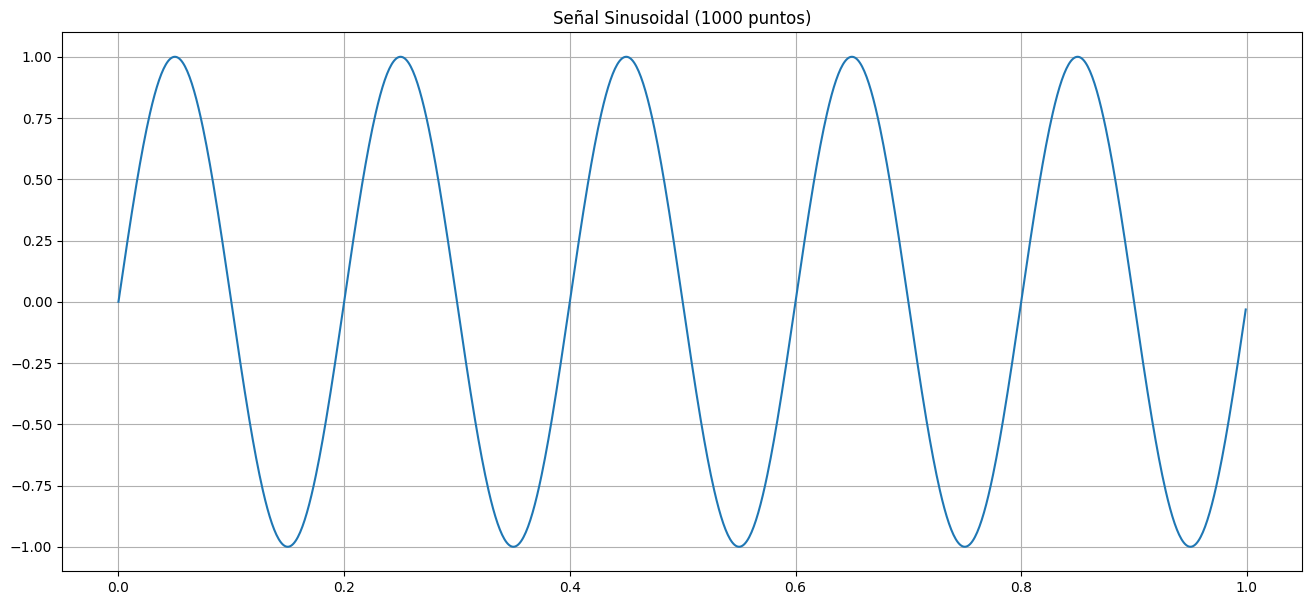

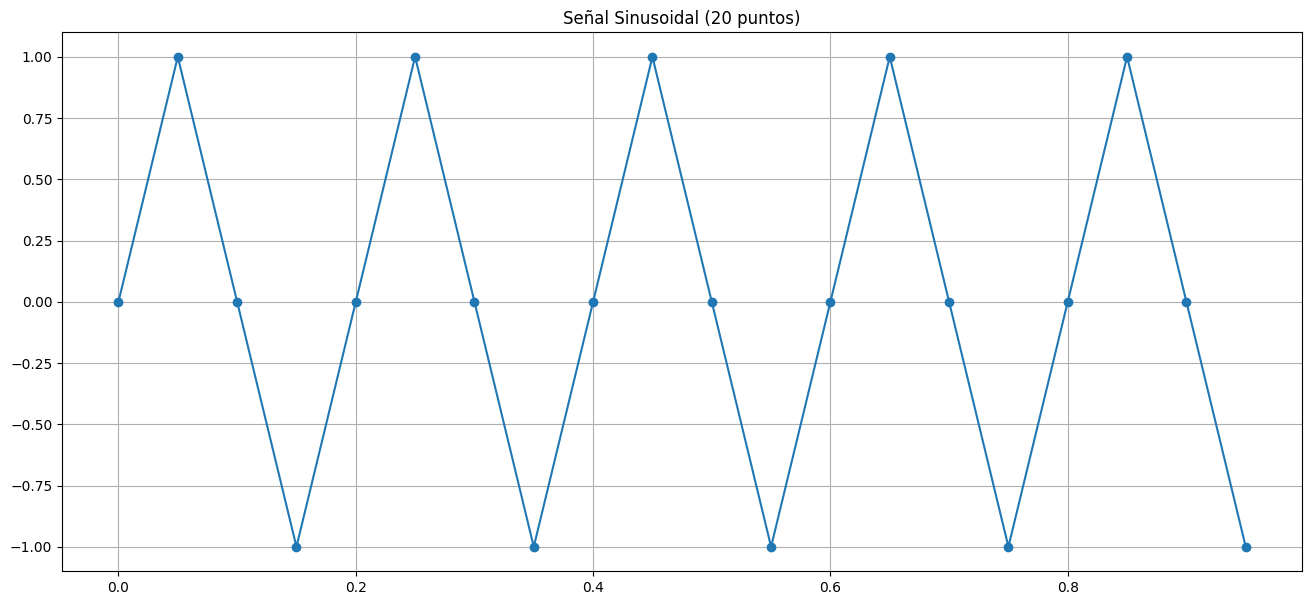

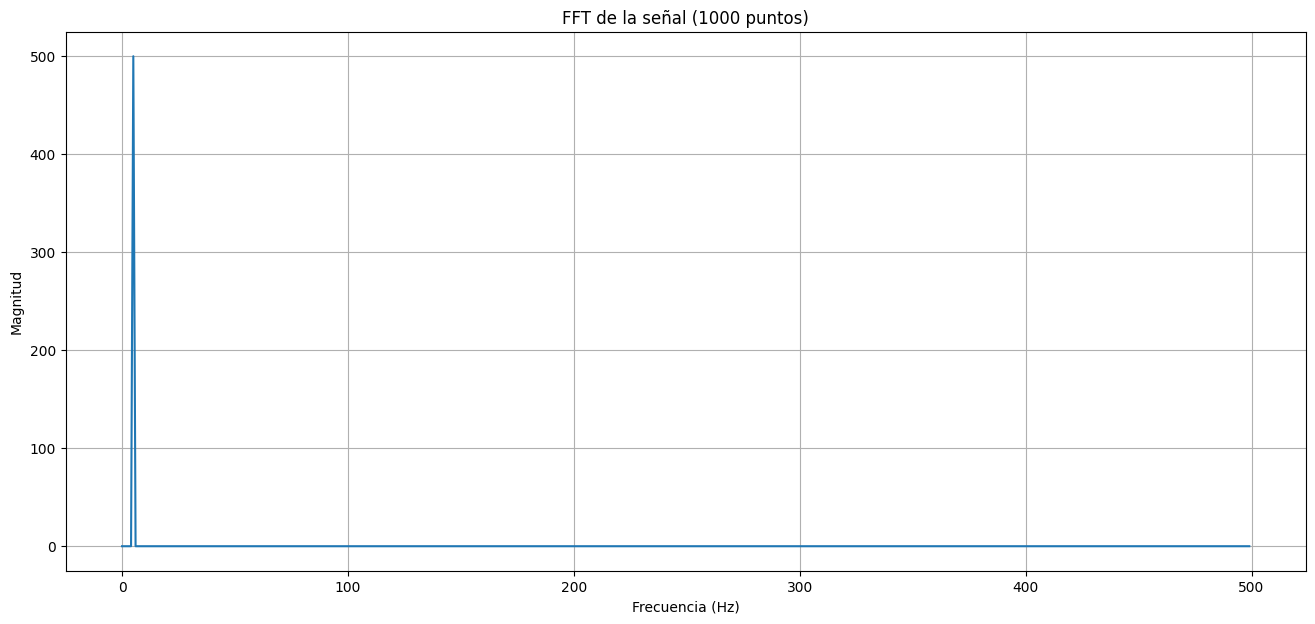

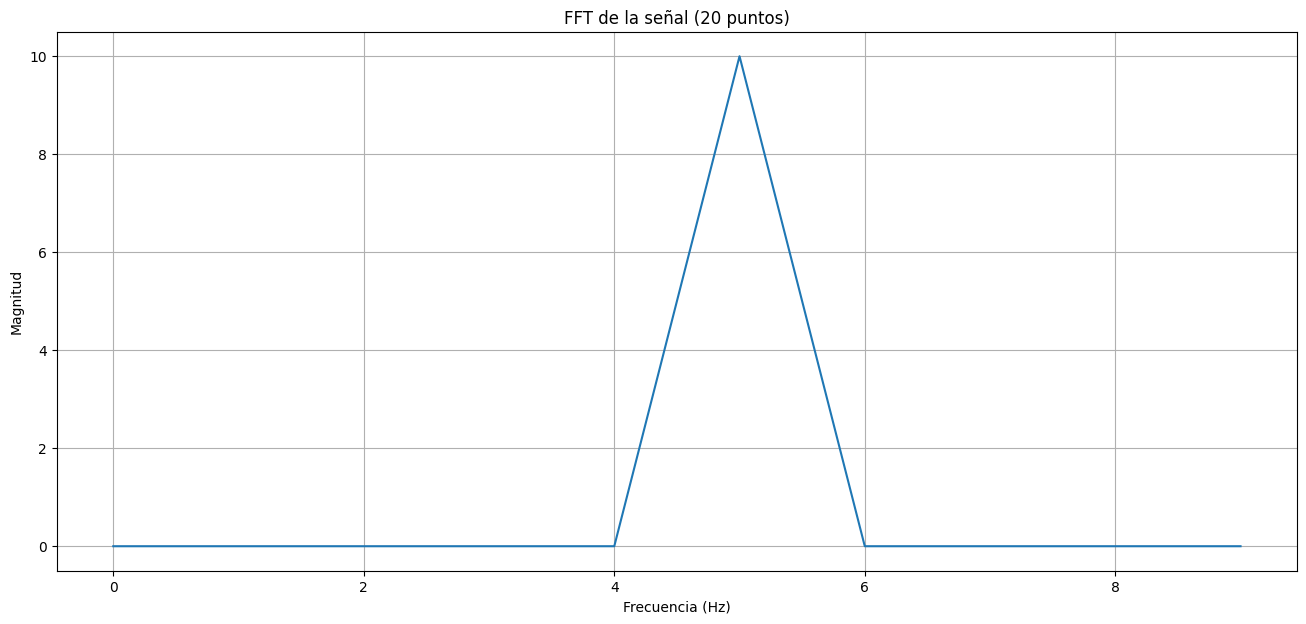

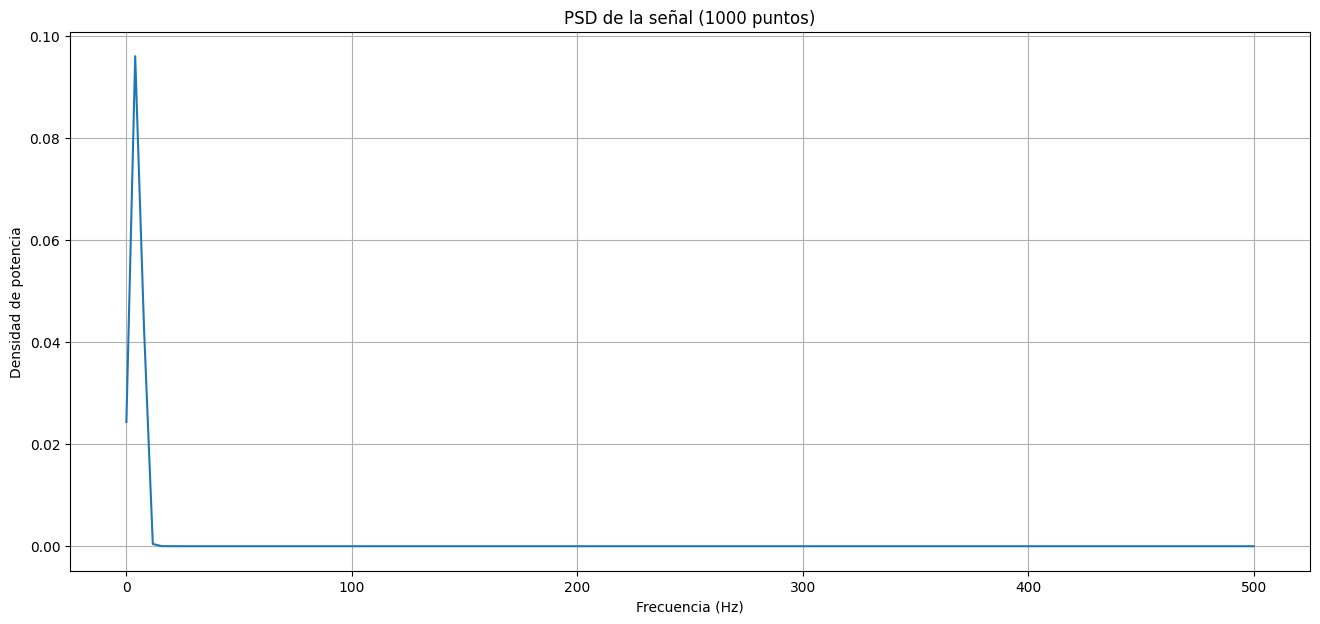

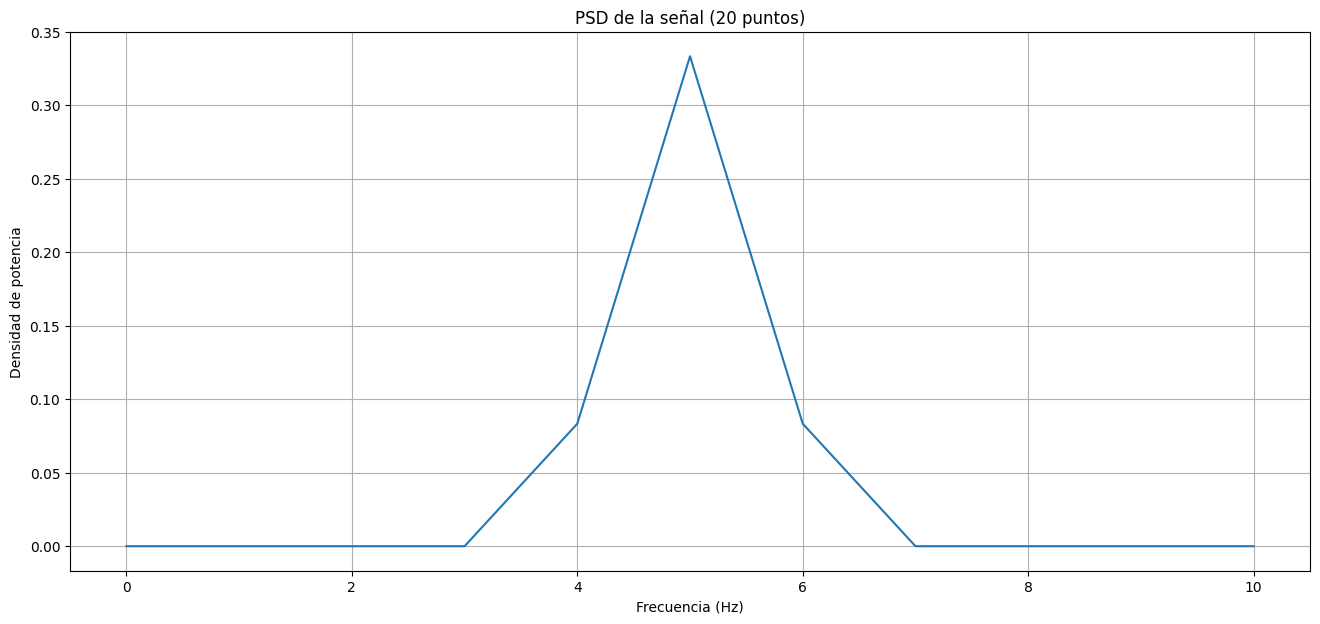

In [23]:
# Inicialización del generador de señales
generador_1000 = SignalGenerator(frequency=5, amplitude=1, duration=1, sampling_rate=1000)  # 1000 puntos
generador_20 = SignalGenerator(frequency=5, amplitude=1, duration=1, sampling_rate=20)      # 20 puntos

# Creación del visualizador
vis = Visualizer(figsize=(16, 7), dpi=100)

# Generación de las señales
senal_1000 = generador_1000.sine_wave
senal_20 = generador_20.sine_wave


# Cálculo de FFT para ambas señales
fft_1000 = np.fft.fft(senal_1000)
fft_20 = np.fft.fft(senal_20)

# Frecuencias asociadas
freq_1000 = np.fft.fftfreq(len(senal_1000), d=(generador_1000.time[1] - generador_1000.time[0]))
freq_20 = np.fft.fftfreq(len(senal_20), d=(generador_20.time[1] - generador_20.time[0]))

# Magnitudes
fft_1000_mag = np.abs(fft_1000[:len(senal_1000)//2])
fft_20_mag = np.abs(fft_20[:len(senal_20)//2])

freq_1000 = freq_1000[:len(senal_1000)//2]
freq_20 = freq_20[:len(senal_20)//2]

# Cálculo de PSD usando Welch
freq_psd_1000, psd_1000 = welch(senal_1000, fs=generador_1000.sampling_rate, nperseg=256)
freq_psd_20, psd_20 = welch(senal_20, fs=generador_20.sampling_rate, nperseg=256)

# Visualización de las señales
vis.plot_signal(senal_1000, time=generador_1000.time, title="Señal Sinusoidal (1000 puntos)")
vis.plot_signal(senal_20, time=generador_20.time, title="Señal Sinusoidal (20 puntos)", marker='o')

# Visualización de la FFT
vis.plot_signal(fft_1000_mag, time=freq_1000, title="FFT de la señal (1000 puntos)", xlabel="Frecuencia (Hz)", ylabel="Magnitud")
vis.plot_signal(fft_20_mag, time=freq_20, title="FFT de la señal (20 puntos)", xlabel="Frecuencia (Hz)", ylabel="Magnitud")

# Visualización del PSD
vis.plot_signal(psd_1000, time=freq_psd_1000, title="PSD de la señal (1000 puntos)", xlabel="Frecuencia (Hz)", ylabel="Densidad de potencia")
vis.plot_signal(psd_20, time=freq_psd_20, title="PSD de la señal (20 puntos)", xlabel="Frecuencia (Hz)", ylabel="Densidad de potencia")
